In [98]:
# 1. There is some bug due to whoch only 400 class of objects are being mapped to word2vec embedding, 
#try to fix this after working on first version


In [7]:
%matplotlib inline
import importlib

In [8]:
import utils2; importlib.reload(utils2)
from utils2 import *

Using TensorFlow backend.
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from bcolz_array_iterator import BcolzArrayIterator
from tqdm import tqdm

In [10]:
limit_mem()

In [11]:
path = '/home/ubuntu/nbs/dataset/train/'
dpath = '/home/ubuntu/nbs/dataset/'

In [7]:
from gensim.models import word2vec

In [8]:
w2v_path = '/home/ubuntu/nbs/dataset/GoogleNews-vectors-negative300'

In [6]:
# Converting word vector's from bin format to txt format
model = word2vec.KeyedVectors.load_word2vec_format(w2v_path+'.bin', binary = True)
model.save_word2vec_format(w2v_path+'.txt', binary=False)

In [9]:
import numpy as np
import pickle
def parse_w2v(l):
    i=l.index(' ')
    return l[:i], np.fromstring(l[i+1:-2], 'float32', sep=' ')

In [10]:
# with io.open(w2v_path+'.txt', "r", encoding="utf-8") as my_file:
lines = open(w2v_path+'.txt', "r", encoding="utf-8").readlines()

In [25]:
lines[3]

'for -0.011780 -0.047363 0.044678 0.063477 -0.018188 -0.063965 -0.001312 -0.072266 0.064453 0.086426 -0.169922 -0.039795 0.071289 -0.025879 0.018188 0.136719 0.144531 -0.033691 -0.097656 -0.120117 -0.079590 0.062500 -0.066895 0.074219 0.022705 0.033447 -0.180664 0.052002 0.013855 0.092773 0.003510 -0.009094 -0.097168 0.067871 -0.008789 0.044189 -0.133789 -0.099609 0.033203 0.027954 0.155273 -0.017700 0.014282 -0.109863 -0.085449 -0.073242 -0.024658 0.172852 0.061768 0.089355 -0.024292 0.141602 -0.032959 0.027466 -0.155273 0.007874 -0.070801 0.043701 0.006012 -0.055908 -0.147461 0.028442 -0.132812 -0.176758 -0.091309 -0.050781 -0.026001 -0.148438 -0.080566 0.150391 -0.043457 0.079102 0.033203 0.090332 0.022705 -0.062500 0.164062 0.085938 -0.012390 0.196289 -0.062256 0.022461 -0.030151 0.021240 0.003326 -0.055420 -0.073242 0.029785 0.049805 0.017456 0.104492 0.038818 0.084961 -0.248047 0.069336 -0.149414 0.058350 0.095703 -0.033447 0.062988 0.021362 -0.145508 0.053711 -0.090820 -0.025391

In [12]:
w2v_list = list(map(parse_w2v, lines[1:]))

In [40]:
pickle.dump(w2v_list, open(path+'../w2vl.pkl', 'wb'))

In [12]:
w2v_list = pickle.load(open(path+'../w2vl.pkl', 'rb'))

In [13]:
w2v_dict = dict(w2v_list)

In [14]:
words,vectors = zip(*w2v_list)

In [15]:
np.corrcoef(w2v_dict['bill'], w2v_dict['BILL'])

array([[ 1.        ,  0.27939364],
       [ 0.27939364,  1.        ]])

In [15]:
# Create Reverse mapping from lower cased word to embedding's
lc_w2v = {w.lower().replace("_"," "): w2v_dict[w] for w in reversed(words)}

In [64]:
# LOL no embedding exist's for lc_w2v["aalekh"]

In [16]:
fpath = '/home/ubuntu/nbs/dataset/imagenet_class_index.json' # Remember to add all these files, I am providing path to

In [17]:
class_dict = json.load(open(fpath))

In [18]:
nclass = len(class_dict);

In [20]:
class_dict

{'0': ['n01440764', 'tench'],
 '1': ['n01443537', 'goldfish'],
 '2': ['n01484850', 'great_white_shark'],
 '3': ['n01491361', 'tiger_shark'],
 '4': ['n01494475', 'hammerhead'],
 '5': ['n01496331', 'electric_ray'],
 '6': ['n01498041', 'stingray'],
 '7': ['n01514668', 'cock'],
 '8': ['n01514859', 'hen'],
 '9': ['n01518878', 'ostrich'],
 '10': ['n01530575', 'brambling'],
 '11': ['n01531178', 'goldfinch'],
 '12': ['n01532829', 'house_finch'],
 '13': ['n01534433', 'junco'],
 '14': ['n01537544', 'indigo_bunting'],
 '15': ['n01558993', 'robin'],
 '16': ['n01560419', 'bulbul'],
 '17': ['n01580077', 'jay'],
 '18': ['n01582220', 'magpie'],
 '19': ['n01592084', 'chickadee'],
 '20': ['n01601694', 'water_ouzel'],
 '21': ['n01608432', 'kite'],
 '22': ['n01614925', 'bald_eagle'],
 '23': ['n01616318', 'vulture'],
 '24': ['n01622779', 'great_grey_owl'],
 '25': ['n01629819', 'European_fire_salamander'],
 '26': ['n01630670', 'common_newt'],
 '27': ['n01631663', 'eft'],
 '28': ['n01632458', 'spotted_salama

In [21]:
classids_1k = dict(class_dict.values());classids_1k

{'n01440764': 'tench',
 'n01443537': 'goldfish',
 'n01484850': 'great_white_shark',
 'n01491361': 'tiger_shark',
 'n01494475': 'hammerhead',
 'n01496331': 'electric_ray',
 'n01498041': 'stingray',
 'n01514668': 'cock',
 'n01514859': 'hen',
 'n01518878': 'ostrich',
 'n01530575': 'brambling',
 'n01531178': 'goldfinch',
 'n01532829': 'house_finch',
 'n01534433': 'junco',
 'n01537544': 'indigo_bunting',
 'n01558993': 'robin',
 'n01560419': 'bulbul',
 'n01580077': 'jay',
 'n01582220': 'magpie',
 'n01592084': 'chickadee',
 'n01601694': 'water_ouzel',
 'n01608432': 'kite',
 'n01614925': 'bald_eagle',
 'n01616318': 'vulture',
 'n01622779': 'great_grey_owl',
 'n01629819': 'European_fire_salamander',
 'n01630670': 'common_newt',
 'n01631663': 'eft',
 'n01632458': 'spotted_salamander',
 'n01632777': 'axolotl',
 'n01641577': 'bullfrog',
 'n01644373': 'tree_frog',
 'n01644900': 'tailed_frog',
 'n01664065': 'loggerhead',
 'n01665541': 'leatherback_turtle',
 'n01667114': 'mud_turtle',
 'n01667778': '

In [22]:
classid_lines = open(dpath+'words.txt', 'r').readlines()

In [23]:
classids = dict(l.strip().split('\t') for l in classid_lines)

In [24]:
classids

{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002137': 'abstraction, abstract entity',
 'n00002452': 'thing',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00003993': 'congener',
 'n00004258': 'living thing, animate thing',
 'n00004475': 'organism, being',
 'n00005787': 'benthos',
 'n00005930': 'dwarf',
 'n00006024': 'heterotroph',
 'n00006150': 'parent',
 'n00006269': 'life',
 'n00006400': 'biont',
 'n00006484': 'cell',
 'n00007347': 'causal agent, cause, causal agency',
 'n00007846': 'person, individual, someone, somebody, mortal, soul',
 'n00015388': 'animal, animate being, beast, brute, creature, fauna',
 'n00017222': 'plant, flora, plant life',
 'n00019046': 'native',
 'n00019128': 'natural object',
 'n00019613': 'substance',
 'n00020090': 'substance',
 'n00020827': 'matter',
 'n00021265': 'food, nutrient',
 'n00021734': 'nutrient',
 'n00021939': 'artifact, artefact',
 'n00022903': 'article',
 'n00023100': 'psychological feature',
 'n0002

In [25]:
len(classids); classids['n00187056']

'bowling score'

In [26]:
syn_wv = [(k, lc_w2v[v.lower().replace('_', " ")]) for k,v in classids.items()
         if v.lower().replace('_', " ") in lc_w2v]

In [27]:
syn_wv_1k = [(k, lc_w2v[v.lower().replace("_"," ")]) for k,v in classids_1k.items()
            if v.lower().replace("_", " ") in lc_w2v]

In [28]:
syn2wv = dict(syn_wv); len(syn2wv)

27456

In [29]:
len(syn_wv_1k)

774

In [30]:
# class_dict
nomatch = [v[0] for v in class_dict.values() if v[0] not in syn2wv];len(nomatch)

600

In [31]:
nm_path=path+'train_nm/';nomatch

['n01440764',
 'n01443537',
 'n01484850',
 'n01491361',
 'n01494475',
 'n01496331',
 'n01518878',
 'n01530575',
 'n01531178',
 'n01532829',
 'n01534433',
 'n01537544',
 'n01558993',
 'n01601694',
 'n01614925',
 'n01622779',
 'n01629819',
 'n01630670',
 'n01632458',
 'n01632777',
 'n01641577',
 'n01644373',
 'n01644900',
 'n01664065',
 'n01665541',
 'n01667114',
 'n01669191',
 'n01675722',
 'n01677366',
 'n01682714',
 'n01685808',
 'n01688243',
 'n01692333',
 'n01693334',
 'n01694178',
 'n01695060',
 'n01697457',
 'n01698640',
 'n01728572',
 'n01728920',
 'n01729322',
 'n01729977',
 'n01734418',
 'n01735189',
 'n01737021',
 'n01739381',
 'n01740131',
 'n01742172',
 'n01744401',
 'n01748264',
 'n01751748',
 'n01753488',
 'n01755581',
 'n01756291',
 'n01770081',
 'n01773157',
 'n01773549',
 'n01773797',
 'n01774384',
 'n01775062',
 'n01795545',
 'n01797886',
 'n01798484',
 'n01817953',
 'n01819313',
 'n01824575',
 'n01843065',
 'n01855032',
 'n01860187',
 'n01872401',
 'n01873310',
 'n018

In [88]:
os.mkdir(nm_path)

In [94]:
for nm in nomatch: 
    try:
        os.rename(path+nm, nm_path+nm)
    except FileNotFoundError:
        continue

In [32]:
matched = [v[0] for v in class_dict.values() if v[0] in syn2wv];

In [33]:
len(matched)

400

In [34]:
fnames = list(glob.iglob(path+'*/*.JPEG'))

In [35]:
pickle.dump(fnames, open(dpath+'fnames.pkl', 'wb'))

In [36]:
fnames = pickle.load(open(dpath + 'fnames.pkl', 'rb'))

In [37]:
fnames = np.random.permutation(fnames)

In [38]:
pickle.dump(fnames, open(dpath+'fnames_r.pkl', 'wb'))

In [39]:
fnames = pickle.load(open(dpath+'fnames_r.pkl', 'rb'))

In [40]:
new_s = 224 # Since we are using ResNET we need to resize images to 224 
n = len(fnames); n

10001

In [41]:
# There needs to be a correction next time you run a notebook: i.e; remove 'backslash' after dpath
bc_path = f'{dpath}/results/trn_resized_{new_s}_r.bc'
mid_path = f'{dpath}/results/features_mid_1c_r.bc'
last_path = f'{dpath}/results/features_last_1c_r.bc'

In [42]:
# Applying Centre Cropping
def _resize(img):
    shortest = min(img.width, img.height)
    resized = np.round(np.multiply(new_s/shortest, img.size)).astype(int)
    return img.resize(resized, Image.BILINEAR)

In [43]:
def resize_img(i):
    img = Image.open(fnames[i])
    s = np.array(img).shape
    if len(s) != 3 or s[2]!=3:
        return
    return _resize(img)

In [44]:
def resize_img_bw(i):
    return _resize(Image.open(fnames[i]).convert('L')) # convert('L') convert's to black and white (1 channel)

In [45]:
t1 = threading.local()

In [46]:
t1.place = np.zeros((new_s, new_s, 3), 'uint8')

In [47]:
arr = bcolz.carray(np.empty((0, new_s, new_s, 3), 'float32'),
                  chunklen=16, mode='w',rootdir = bc_path)

In [48]:
def get_slice(p, n): return slice((p-n+1)//2, p-(p-n)//2)

In [49]:
def app_img(r):
    t1.place[:] = (np.array(r)[get_slice(r.size[1], new_s), get_slice(r.size[0], new_s)]
                  if r else 0.)
    arr.append(t1.place)

In [50]:
for i in range(2000): app_img(resize_img(i))
arr.flush()

In [134]:
# Write a parallel version of above serial 
# step = 6400
# for i in tqdm(range(0, n, step))

In [51]:
arr = bcolz.open(bc_path)

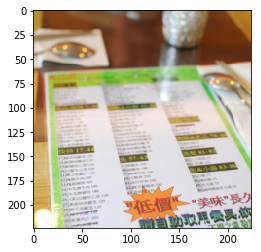

In [53]:
plt.imshow(arr[5].astype('uint8'))

In [54]:
arr.size
## Creating Model 

301056000

In [55]:
def getSynset(f): return f[f.rfind('/')+1:f.find('_')]

In [56]:
labels = list(map(getSynset, fnames))

In [57]:
labels[0]

'n02011460'

In [58]:
vecs = np.stack([syn2wv[l] for l in labels]); vecs.shape

(10001, 300)

In [59]:
vecs[0]

array([-0.26953101,  0.28125   , -0.27343801, -0.061035  ,  0.212891  ,
       -0.108398  , -0.175781  , -0.02478   ,  0.45898399,  0.203125  ,
       -0.041016  , -0.225586  , -0.028564  , -0.116211  ,  0.124023  ,
       -0.265625  , -0.131836  , -0.144531  ,  0.12695301, -0.22949199,
       ...,  0.20214801, -0.026733  ,  0.208984  , -0.055664  ,
        0.066406  , -0.28710899, -0.084473  , -0.066406  , -0.02063   ,
        0.27148399,  0.087891  , -0.23535199, -0.093262  ,  0.082031  ,
       -0.123047  , -0.265625  ,  0.18457   , -0.023682  ,  0.38476601,
       -0.37108999], dtype=float32)

In [60]:
# For ResNET model, we need to normalize as:
rn_mean = np.array([123.68, 116.779, 103.939], dtype = np.float32).reshape((1, 1, 3));rn_mean

array([[[ 123.68000031,  116.77899933,  103.93900299]]], dtype=float32)

In [61]:
inp = Input((224, 224, 3)) #Input layer, resnet requires 224*224 input

In [62]:
preproc = Lambda(lambda x: (x-rn_mean)[:, :, :, ::-1])(inp)
model = ResNet50(include_top=False, input_tensor=preproc)

In [63]:
mid_start = model.get_layer('res5b_branch2a')
mid_out = model.layers[model.layers.index(mid_start)-1]
shp = mid_out.output_shape; shp

(None, 7, 7, 2048)

In [64]:
rn_top = Model(model.input, mid_out.output)
rn_top_avg = Sequential([rn_top, AveragePooling2D((7, 7))])
shp = rn_top_avg.output_shape; shp

(None, 1, 1, 2048)

In [65]:
features_mid = bcolz.carray(np.empty((0,)+shp[1:]),
                           chunklen=16, mode='w', rootdir=mid_path)

In [66]:
def gen_features_mid(dirn):
    gen = (arr[i:min(i+128, n)] for i in range(0, n, 128))
    for i,batch in tqdm(enumerate(gen)):
        features_mid.append(rn_top_avg.predict_on_batch(batch[:,:,::dirn]))
#         if(i%100==99): features_mid.flush()
    features_mid.flush()

In [1]:
gen_features_mid(1)

NameError: name 'gen_features_mid' is not defined

In [217]:
gen_features_mid(-1)

32it [00:41,  1.29s/it]


In [1]:
features_mid.shape

NameError: name 'features_mid' is not defined

In [200]:
rn_bot_inp = Input(shp[1:])
x = rn_bot_inp
x = identity_block(x, 3, [512, 512, 2048], stage=4, block='f')
x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')
x = Flatten()(x)
rn_bot = Model(rn_bot_inp, x)
rn_bot.output_shape

(None, 2048)

In [190]:
# for i in range(len(rn_bot.layers)-1):
#     rn_bot.layers[-i-2].set_weights(model.layers[-i-2].get_weights())

In [201]:
%time features_last = rn_bot.predict(features_mid, batch_size=128)

CPU times: user 1.22 s, sys: 64 ms, total: 1.28 s
Wall time: 2.07 s


In [202]:
features_last = bcolz.carray(features_last, chunklen=64, mode='w',
                                       rootdir=last_path)

In [203]:
features_last = bcolz.open(last_path)[:]; features_last

array([[  1.28539193e+00,   2.01747701e-01,   4.73598927e-01,
          7.88815841e-02,   0.00000000e+00,   8.33120421e-02,
          4.59067732e-01,   8.12338293e-02,   3.25018503e-02,
          5.01880161e-02,   0.00000000e+00,   5.02074361e-01,
          4.18448001e-02,   0.00000000e+00,   1.46264583e-01,
          4.18787077e-02,   6.43222630e-01,   1.34521261e-01,
          6.36392608e-02,   2.87667452e-03, ...,   0.00000000e+00,
          0.00000000e+00,   6.94657564e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.77349567e-01,   5.71875989e-01,   1.54838711e-02,
          1.20280281e-01,   1.40476570e-01,   0.00000000e+00,
          3.92872870e-01,   0.00000000e+00,   2.15345651e-01,
          7.97252893e-01,   6.91551924e-01,   1.54133141e-01,
          4.30997200e-02],
       [  1.61602452e-01,   1.10806549e+00,   1.76490098e-01,
          1.26690641e-01,   0.00000000e+00,   2.46228844e-01,
          2.84610037e-02,   1.62443936

In [209]:
ndim = 300
lm_inp = Input(shape=(2048,))
lm = Model(lm_inp, Dense(ndim)(lm_inp)) # Predicting 300 size word vector

In [207]:
# Using cosine distance as metric for K nearest Neighbours
def cos_distance(y_true, y_pred):
    y_true = K.l2_normalize(y_true, axis=-1)
    y_pred = K.l2_normalize(y_pred, axis =-1)
    return K.mean(1-K.sum((y_true*y_pred), axis=-1))

In [210]:
lm.compile('adam', 'cosine_proximity')

In [214]:
# features_last[0]
lm.evaluate(features_last, vecs, verbose=0)

ValueError: Input arrays should have the same number of samples as target arrays. Found 8000 input samples and 10001 target samples.